# OCR Project 1 - Searching for specific terms

# Installing Tesseract

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 23 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (7,874 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [ ]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

--2023-03-18 09:40:16--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2023-03-18 09:40:17--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2023-03-18 09:40:17--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

# Importing the libraries

In [ ]:
import pytesseract
from pytesseract import Output
import numpy as np
import cv2
import os
import re
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image

# Connecting to Google Drive and visualizing the images

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -R /content/gdrive/MyDrive/Cursos\ -\ recursos/OCR\ with\ Python/Images/Images\ Project\ 1/ images/

In [ ]:
directory_imgs = "images/"
paths = [os.path.join(directory_imgs, f) for f in os.listdir(directory_imgs)]
print(paths)

['images/referencias_artigo.jpg', 'images/artigo_introducao_vc.jpg', 'images/caixa-refrigerador.jpg', 'images/informacao_nutricional.jpg', 'images/ebook_sistemasoperacionais.jpg', 'images/receita02.jpg', 'images/prefacio_tanenbaum.jpg']


In [ ]:
def show_img(img):
  fig = plt.gcf()
  fig.set_size_inches(20, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

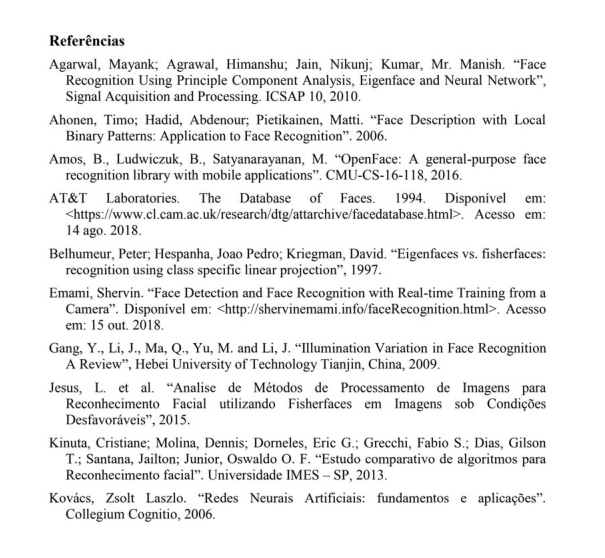

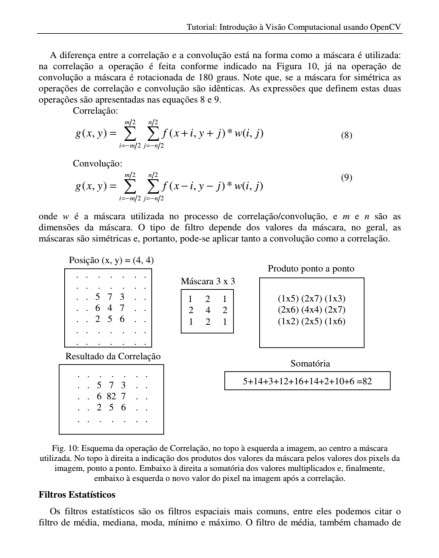

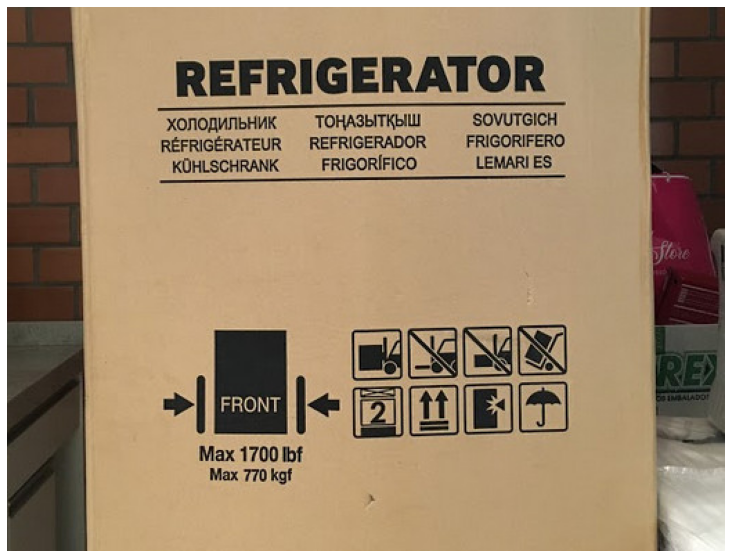

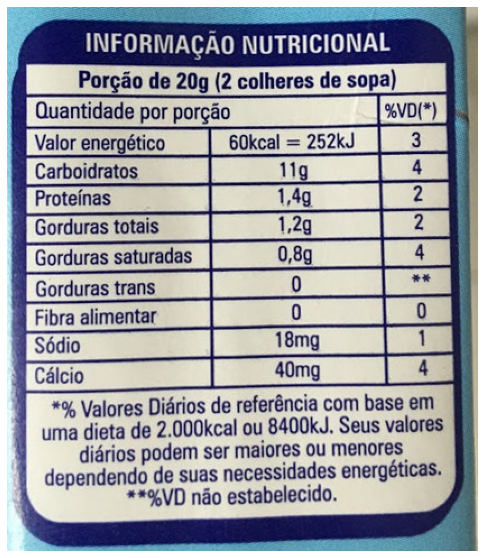

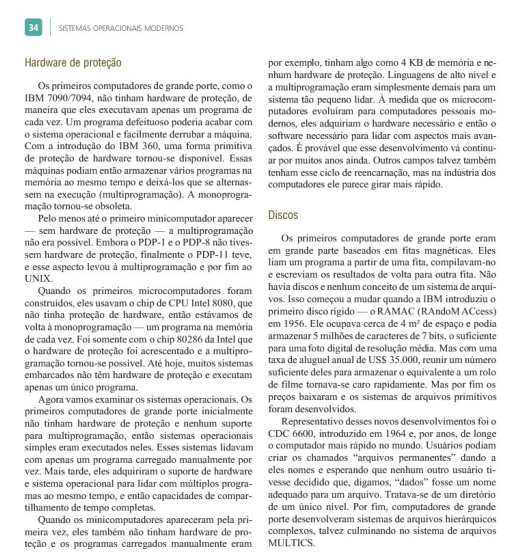

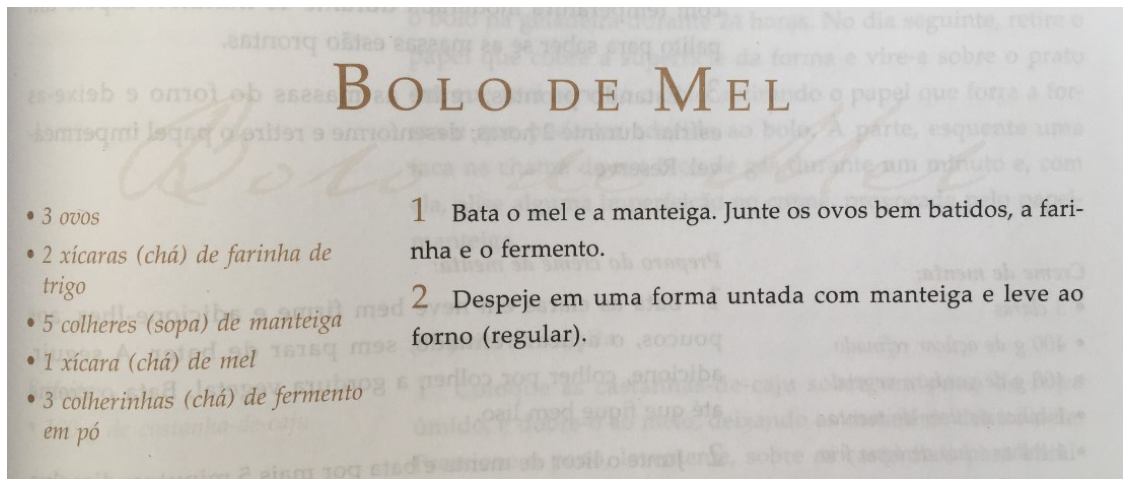

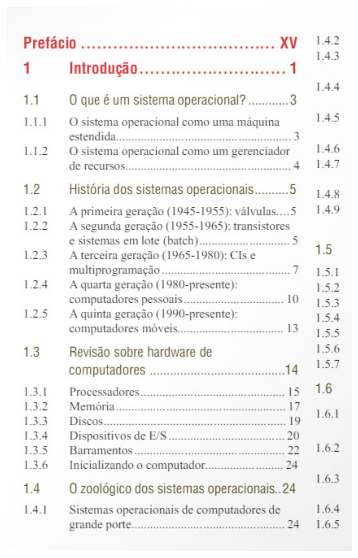

In [ ]:
for image in paths:
  image = cv2.imread(image)
  show_img(image)

# Tesseract settings

In [ ]:
config_tesseract = "--tessdata-dir tessdata"

In [ ]:
def tesseract_ocr(img, config_tesseract):
  text = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
  return text

# Text recognition

In [ ]:
full_text = ''
txt_file = 'results_ocr.txt'

In [ ]:
for image in paths:
  #print(image)
  img = cv2.imread(image)
  file_image = os.path.split(image)[-1]
  #print(file_image)
  file_image_separate = '================\n' + str(file_image)
  #print(file_image_separate)
  full_text = full_text + file_image_separate + '\n'

  text = tesseract_ocr(img, config_tesseract)
  #print(text)
  full_text = full_text + text

In [ ]:
full_text

'================\nreferencias_artigo.jpg\n================\nartigo_introducao_vc.jpg\n================\ncaixa-refrigerador.jpg\n================\ninformacao_nutricional.jpg\n================\nebook_sistemasoperacionais.jpg\n================\nreceita02.jpg\n================\nprefacio_tanenbaum.jpg\n================\nreferencias_artigo.jpg\nReferências\n\nAgarwal, Mayank; Agrawal, Himanshu; Jain, Nikunj; Kumar, Mr. Manish. “Face\nRecognition Using Principle Component Analysis, Eigenface and Neural Network”,\nSignal Acquisition and Processing. ICSAP 10, 2010.\n\nAhonen, Timo; Hadid, Abdenour; Pietikainen, Matti. “Face Description with Local\nBinary Patterns: Application to Face Recognition”. 2006.\n\nAmos, B., Ludwiczuk, B., Satyanarayanan, M. “OpenFace: A general-purpose face\nrecognition library with mobile applications”. CMU-CS-16-118,2016.\n\nAT&T  Laboratoriess. The Database of Faces. 1994  Disponível em:\n<https://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html>. Acesso 

## Saving the results

In [ ]:
file_txt = open(txt_file, 'w+')
file_txt.write(full_text + '\n')
file_txt.close()

## Searching in the .txt file

In [ ]:
term_search = 'computador' # computer

In [ ]:
with open('/content/results_ocr.txt') as f:
  results = [i.start() for i in re.finditer(term_search, f.read())]

In [ ]:
results

[4526,
 5085,
 5344,
 5822,
 6274,
 6650,
 6950,
 7018,
 7876,
 8158,
 9141,
 9202,
 9258,
 9369,
 9452]

In [ ]:
len(results)

15

## Searching in the images

In [ ]:
for image in paths:
  #print(image)
  img = cv2.imread(image)
  file_img = os.path.split(image)[-1]
  print('==================\n' + str(file_img))
  text = tesseract_ocr(img, config_tesseract)
  results = [i.start() for i in re.finditer(term_search, text)]
  print('Number of times the term {} appears: {}'.format(term_search, len(results)))
  print('\n')

referencias_artigo.jpg
Number of times the term computador appears: 0


artigo_introducao_vc.jpg
Number of times the term computador appears: 0


caixa-refrigerador.jpg
Number of times the term computador appears: 0


informacao_nutricional.jpg
Number of times the term computador appears: 0


ebook_sistemasoperacionais.jpg
Number of times the term computador appears: 10


receita02.jpg
Number of times the term computador appears: 0


prefacio_tanenbaum.jpg
Number of times the term computador appears: 5




## Word cloud

In [ ]:
# https://spacy.io
import spacy

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


> Update in 2023: for more recent spacy versions, now it's necessary to change the name of the package, from:
  * `pt` to `pt_core_news_sm`
  * `en` to `en_core_web_sm`

> This change is required in the *download command* below and also in the `spacy.load()` parameter

In [ ]:
!python -m spacy download pt_core_news_sm

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-18 09:38:12.819175: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-18 09:38:12.819344: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-18 09:38:12.819373: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-18 09:38:32.060297: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-18 09:38:32.060501: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-18 09:38:32.060524: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
nlp_en = spacy.load('en_core_web_sm')

In [ ]:
print(spacy.lang.en.stop_words.STOP_WORDS)

{'either', 'herein', 'everywhere', 'hereupon', 'herself', 'our', 'now', 'several', 'hereby', 'else', 'afterwards', 'when', 'by', 'first', 'without', 'one', 're', 'ca', 'per', 'below', 'least', 'however', 'fifteen', 'five', 'myself', 'am', 'latter', 'done', 'you', 'much', '’m', 'somehow', 'name', 'moreover', 'would', 'often', 'seems', 'put', 'them', 'enough', 'while', 'well', 'twelve', 'so', 'more', '‘m', 'most', 'was', 'others', 'two', 'through', 'although', '‘ll', 'do', 'toward', 'whole', 'here', "'m", 'four', 'call', 'rather', 'yourself', 'all', 'whence', 'anyway', "'re", 'hers', 'in', 'always', 'many', 'whatever', 'somewhere', 'have', 'someone', 'which', 'next', 'amongst', 'amount', 'these', 'few', 'become', 'hence', 'to', 'becomes', 'eleven', 'third', 'such', 'too', 'as', 'unless', 'nevertheless', '‘re', 'nowhere', 'seemed', 'take', 'whither', 'both', 'along', 'your', 'still', 'ten', 'alone', 'will', '‘ve', 'upon', 'among', 'made', '’d', 'fifty', 'should', 'every', 'behind', 'or', 

In [ ]:
len(spacy.lang.en.stop_words.STOP_WORDS)

326

In [ ]:
nlp = spacy.load('pt_core_news_sm')

In [ ]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS
print(stop_words)

{'dezasseis', 'ambos', 'tanto', 'para', 'cima', 'três', 'vai', 'minhas', 'ter', 'são', 'minha', 'tuas', 'quais', 'mas', 'nos', 'o', 'sobre', 'doze', 'diante', 'era', 'que', 'área', 'depois', 'dezanove', 'parece', 'apoio', 'atrás', 'mal', 'tarde', 'possivelmente', 'ora', 'estás', 'aí', 'tentar', 'uns', 'vossas', 'dar', 'dizem', 'da', 'fazeis', 'pelo', 'próxima', 'quinto', 'todos', 'vos', 'baixo', 'agora', 'cada', 'favor', 'oito', 'és', 'estava', 'fazemos', 'foram', 'valor', 'vem', 'dezoito', 'essas', 'meio', 'mês', 'povo', 'meu', 'vinte', 'portanto', 'pela', 'contra', 'vais', 'sempre', 'só', 'faço', 'maioria', 'através', 'à', 'número', 'acerca', 'nada', 'mais', 'tais', 'tipo', 'também', 'sua', 'os', 'iniciar', 'outras', 'qual', 'do', 'segunda', 'apontar', 'bem', 'debaixo', 'estiveste', 'próprio', 'estiveram', 'terceiro', 'ou', 'teu', 'tal', 'cedo', 'fez', 'puderam', 'sem', 'neste', 'tens', 'disso', 'tão', 'desse', 'está', 'foste', 'esta', 'nenhuma', 'pouco', 'foi', 'fui', 'estou', 'têm'

In [ ]:
len(stop_words)

416

In [ ]:
def preprocessing(text):
  text = text.lower()

  document = nlp(text)
  tokens_list = []
  for token in document:
    #print(token)
    tokens_list.append(token.text)
  #print(tokens_list)

  tokens = [word for word in tokens_list if word not in stop_words]
  #print(tokens)
  tokens = ' '.join([str(element) for element in tokens])
  #print(tokens)
  return tokens

In [ ]:
preprocessing('Note que, se a máscara for simétrica as operações de correlação')

'note , máscara simétrica operações correlação'

In [ ]:
processed_full_text = preprocessing(full_text)

In [ ]:
len(full_text), len(processed_full_text)

(9586, 8733)

In [ ]:
9586 - 8944

642

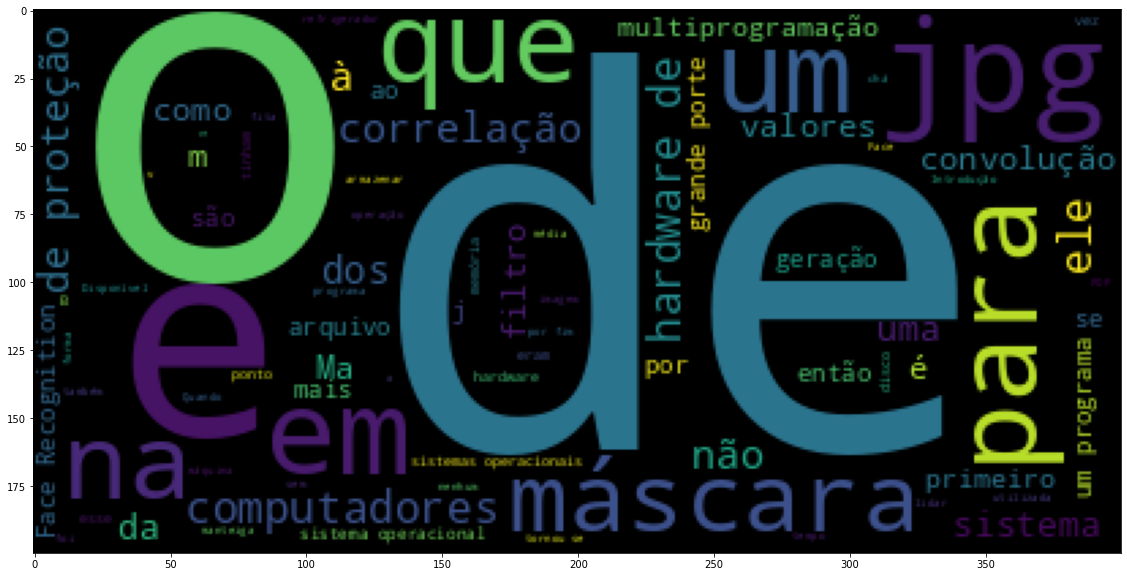

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(full_text)); # of, what, the -> stopwords

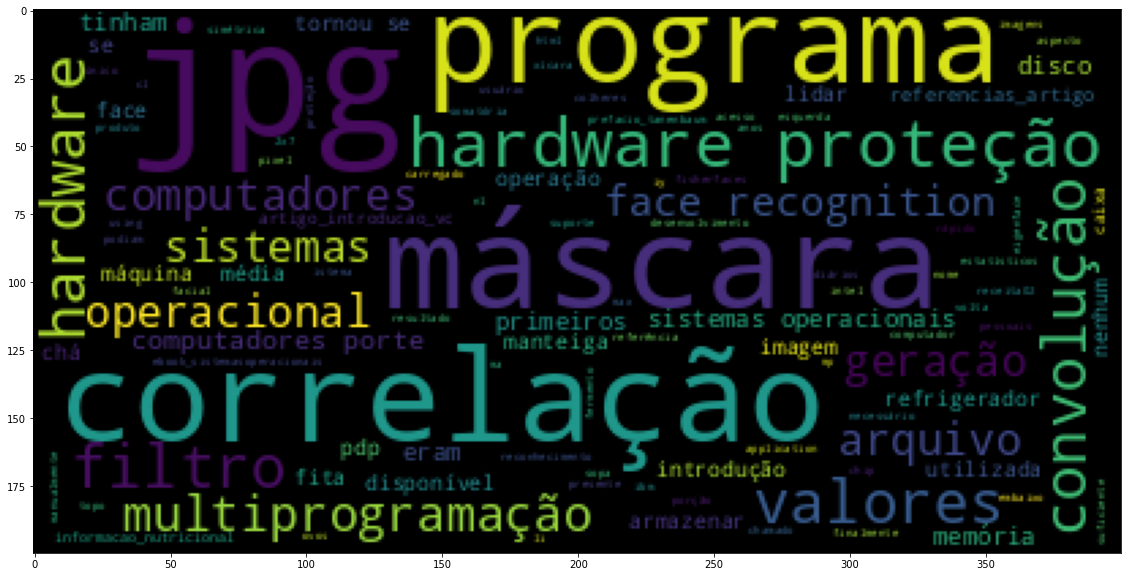

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(processed_full_text));

## Named entity recognition

- Documentation: https://spacy.io/api/annotation#named-entities

In [ ]:
document = nlp(processed_full_text)

In [ ]:
from spacy import displacy
displacy.render(document, style = 'ent', jupyter = True)

In [ ]:
for entity in document.ents:
  if entity.label_ == 'PER':
    print(entity.text, entity.label_)

peter PER
hespanha PER
joao pedro PER
kriegman PER
david PER
jesus PER
l. et al PER
molina PER
dennis PER
dorneles PER
eric g. PER
grecchi PER
fabio s. PER
dias PER
gilson 
 t. PER
zsolt laszlo PER


# Text recognition in the images

## Function to write in the images

In [ ]:
font = '/content/calibri.ttf'

In [ ]:
def write_text(text, x, y, img, font, color=(50, 50, 255), font_size=16):
  font = ImageFont.truetype(font, font_size)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y-font_size), text, font = font, fill = color)
  img = np.array(img_pil)

  return img

## Function to show the detections

In [ ]:
min_conf = 30

In [ ]:
def box(i, result, img, color=(255, 100, 0)):
  x = result["left"][i]
  y = result["top"][i]
  w = result["width"][i]
  h = result["height"][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

  return x, y, img

In [ ]:
# computer - Computer

In [ ]:
def ocr_process_image(img, term_search, config_tesseract, min_conf):
  result = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT)
  number_of_times = 0
  for i in range(0, len(result['text'])):
    confidence = int(result['conf'][i])
    if confidence > min_conf:
      text = result['text'][i]
      if term_search.lower() in text.lower():
        x, y, img = box(i, result, img, (0,0,255))
        img = write_text(text, x, y, img, font, (50,50,225), 14)
        number_of_times += 1
  return img, number_of_times

## Searching for specific terms

referencias_artigo.jpg
Number of times term computador appears in referencias_artigo.jpg: 0




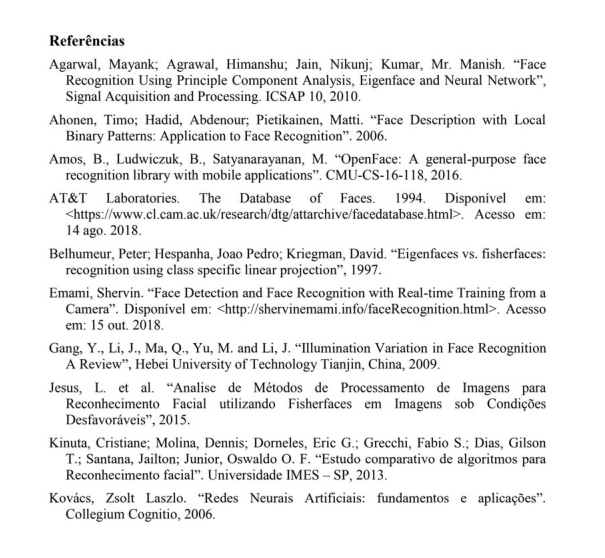

artigo_introducao_vc.jpg
Number of times term computador appears in artigo_introducao_vc.jpg: 0




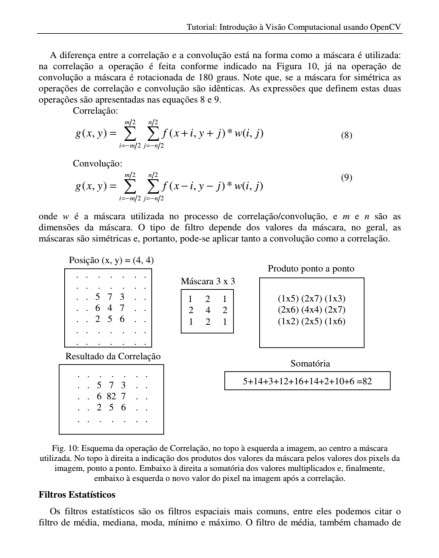

caixa-refrigerador.jpg
Number of times term computador appears in caixa-refrigerador.jpg: 0




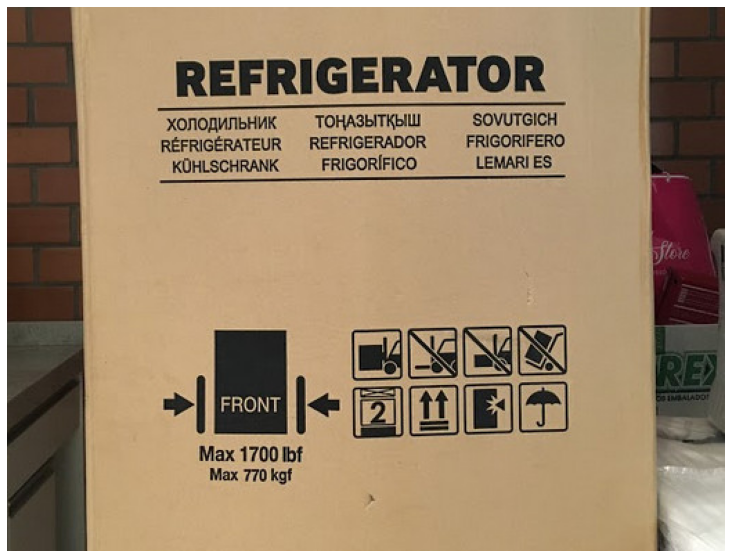

informacao_nutricional.jpg
Number of times term computador appears in informacao_nutricional.jpg: 0




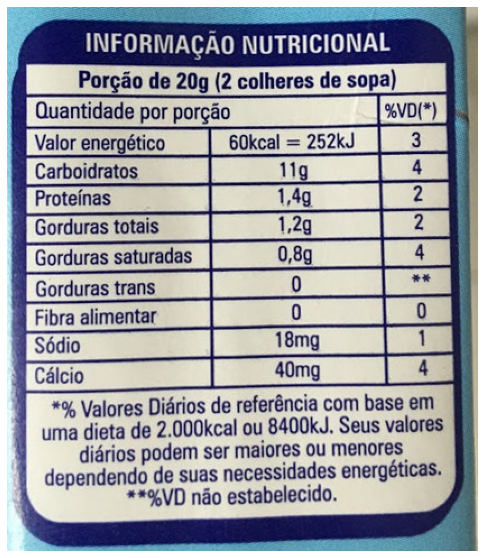

ebook_sistemasoperacionais.jpg
Number of times term computador appears in ebook_sistemasoperacionais.jpg: 10




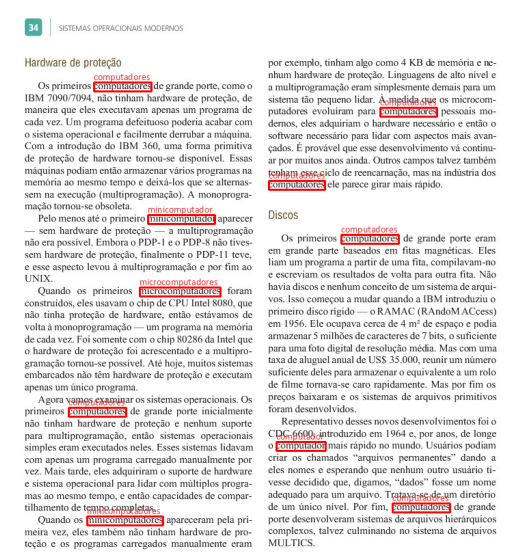

receita02.jpg
Number of times term computador appears in receita02.jpg: 0




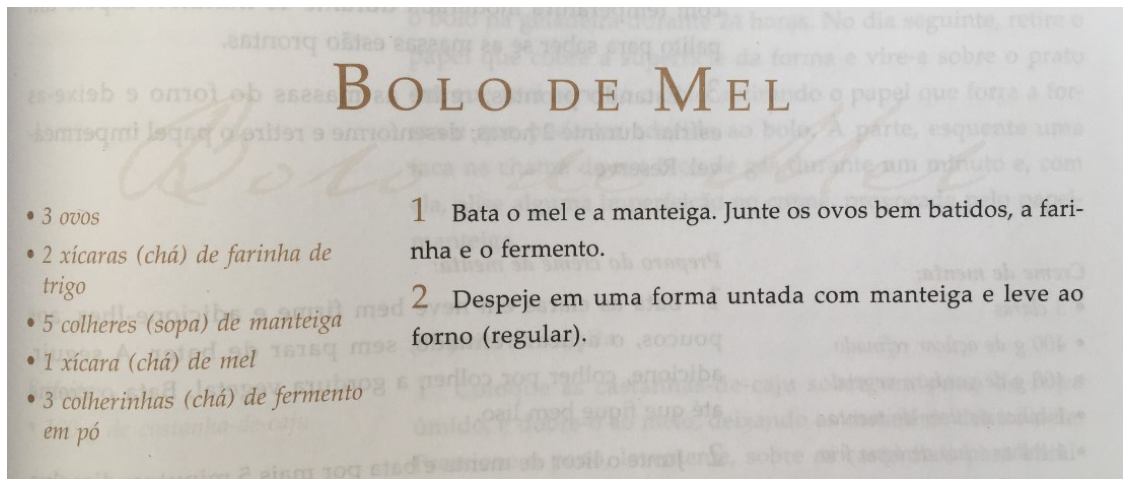

prefacio_tanenbaum.jpg
Number of times term computador appears in prefacio_tanenbaum.jpg: 5




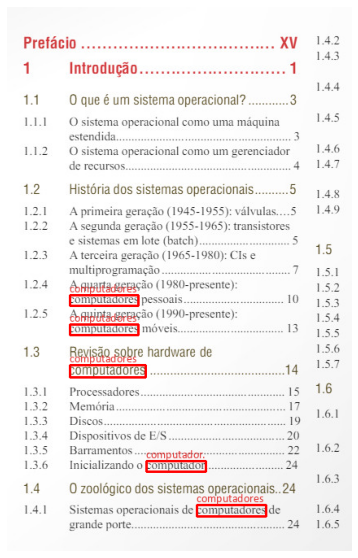

In [ ]:
term_search = 'computador' # computer
for image in paths:
  #print(image)
  img = cv2.imread(image)
  img_original = img.copy()
  file_image = os.path.split(image)[-1]
  print('=================\n' + str(file_image))

  img, number_of_times = ocr_process_image(img, term_search, config_tesseract, min_conf)
  print('Number of times term {} appears in {}: {}'.format(term_search, file_image, number_of_times))
  print('\n')
  show_img(img)

## Saving the results

In [ ]:
term_search = 'sopa' # soup

In [ ]:
os.makedirs('processed_images', exist_ok = True)

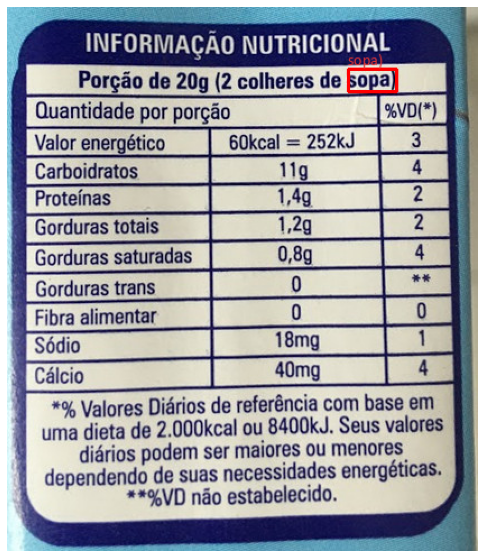

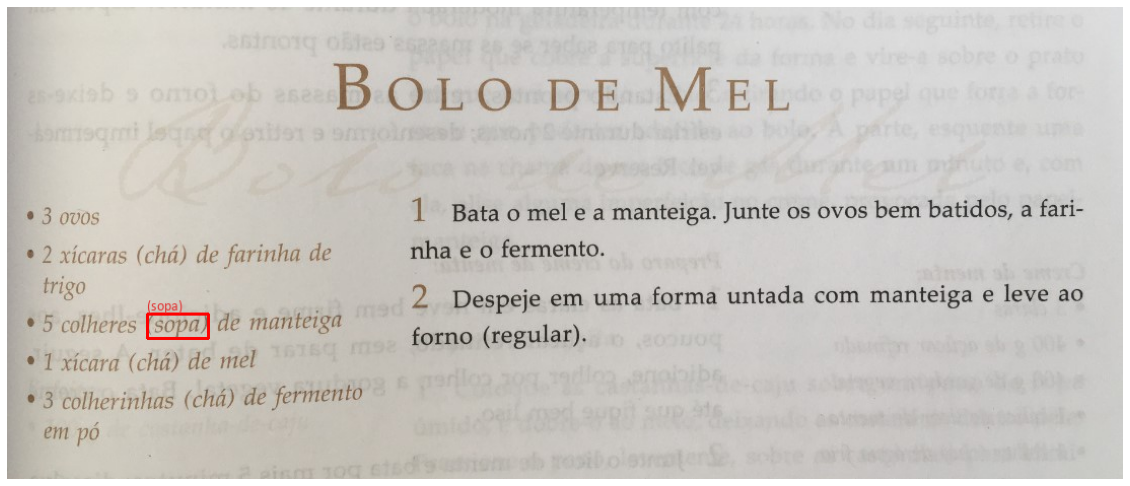

In [ ]:
for image in paths:
  #print(image)
  img = cv2.imread(image)
  img_original = img.copy()
  file_image = os.path.split(image)[-1]
  img, number_of_times = ocr_process_image(img, term_search, config_tesseract, min_conf)
  if number_of_times > 0:
    show_img(img)
    new_file_image = 'processed_' + file_image
    new_image = '/content/processed_images/' + str(new_file_image)
    cv2.imwrite(new_image, img)